### AIM:DECISSION TREE IMPLEMENTATION

### DESCRIPTION:

A decision tree is a popular machine learning algorithm that uses a tree-like model of decisions and their possible outcomes to make predictions or classify new data points.Each node represents a feature, and each edge represents a possible outcome for that feature.Decision trees can be used for both classification and regression tasks.



<h1>Importing required libraries</h1>

<u>graphviz</u>: for visualizing the tree in the picture format

<u>pandas</u>: for loading and and performing various operations on the datasets

<u>math</u>: for using math functions like log,etc.

<u>numpy</u>: for performing numerical operations more easier such as finding the max of the dictionary etc..

In [113]:
import graphviz
import pandas as pd
import math
import numpy as np

Creating Node class which is useful for creating the node of the decision tree

This node class contains the following functions:
    
      __init__:
                for creating the node
      add_children:
                for creating the children of the node
      add_label:
                for creating the label which is further used while visualizing the decision tree this stores the values of the attributes
      Print_node:
                for printing the node
      draw:
            to create a node and draw corresponding edges so as to visualize in the form of a tree

In [114]:
class Node:
  def __init__(self,name,value):
    self.name=name
    self.value=value
    self.children=[]
    self.label=[]
  def add_children(self,node):
    self.children.append(node)
  def add_label(self,label):
    self.label.append(label)
  def Print_node(self):
    print(self.name)
    for x in self.children:
      Node.Print_node(x)
  def draw(self, dot):
    dot.node(name=self.name,label=self.name)
    z=0
    for chil in self.children:
      dot.edge(self.name, chil.name ,label=self.label[z])
      z=z+1
      chil.draw(dot)

***Creating the Tree class that is helpful for storing the address of root node and based on that value we will construct the tree

In [115]:
class Tree:
  def __init__(self,node):
    self.root=node
  def Print_tree(self):
    self.root.Print_node()
  def draw(self):
    dot = graphviz.Digraph(comment='Tree')
    self.root.draw(dot)
    return dot

***Reading the dataset to the variable df

In [116]:
path="/content/drive/MyDrive/MachineLearning/09-01-2023/playtennis.csv"
df=pd.read_csv(path)

***printing the dataframe

In [117]:
df

,OUTLOOK,TEMP,HUMIDITY,WIND,PLAY TENNIES
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


***To check the features or attributes of the dataframe we use .columns

In [118]:
df.columns

Index(['OUTLOOK', 'TEMP', 'HUMIDITY', 'WIND', 'PLAY TENNIES'], dtype='object')

***Store the class variable into the variable outcome

In [119]:
outcome=df.columns[-1]

In [120]:
outcome

'PLAY TENNIES'

In [121]:
node_no=0

Constructing the DecisionTree class.

The functions in this class are:

        entropy:
              to calculate the entropy of the given feature

Formula for entropy:
                   
$Entropy=-\sum_{i=1}^{c}(P(x_i)log_bP(x_i))$

        feature_probability:
                to calculate the probability of the given feature or attribute 
                this returns all the probability values of the elements of the particular feature
        
        information_gain:
                to calculate the information gain of the given feature.
                This can be found by calculating the difference between the total entropy of the dataset and the conditional entropy 


Formula for Informaton Gain:

$IG=Entropy(T)-\sum_{v\in values(A)}\frac{|T_{v}|}{T}Entropy(T_{v})$

        decisionTree:
                This is useful to calculate the best features based on the information gain. This create the node and passes to the class Node.

In [122]:
class DecisionTree:
  
  def entropy(self,data):
      unique,counts = np.unique(data[outcome], return_counts=True)
      probability = counts / len(data)
      entropy = -np.sum(probability * np.log2(probability))
      return entropy

  def feature_probability(self,data, feature):
      n = len(data)
      feature_values = np.unique(data[feature])
      probs = {}
      for value in feature_values:
          subset = data[data[feature] == value]
          probs[value] = len(subset) / n
      return probs

  def information_gain(self,data, feature):
      totalEntropy = self.entropy(data)
      probabilities = self.feature_probability(data, feature)
      conditionalEntropy = 0
      for value, prob in probabilities.items():
          subset = data[data[feature] == value]
          conditionalEntropy += prob * self.entropy(subset)
      return totalEntropy - conditionalEntropy

  def decissionTree(self,dataset):
      def __init__(self):
        self.root = None
      self.dataset = None
      global node_no
      informationGains={}
      if dataset.empty:
          return
      if len(dataset[outcome].unique())==1:
          for i in dataset[outcome].unique():
              node_no+=1
              return Node(i+'('+str(node_no)+')',self.information_gain(dataset,outcome))
      for i in dataset.columns[0:-1]:
          informationGains[i]=self.information_gain(dataset,i)
      max_feature=max(informationGains,key=informationGains.get)
      node_no+=1
      root=Node(max_feature,informationGains[max_feature])
      for i in dataset[max_feature].unique():
          #child=Node(i,i)
          #root.add_children(child)
          root.add_label(i)
          subset=dataset[dataset[max_feature]==i].drop(max_feature,axis=1)
          #print(subset)
          child=self.decissionTree(subset)
          root.add_children(child)
      return root


creating the object for the class DecisionTree

In [123]:
dt=DecisionTree()

creating required objects

In [124]:
value=dt.information_gain(df, outcome)
root=dt.decissionTree(df)
node=Node(root,value)
tree = Tree(node.name)
tree.Print_tree()

OUTLOOK
HUMIDITY
no(3)
yes(4)
yes(5)
WIND
yes(7)
no(8)


Printing the decission Tree

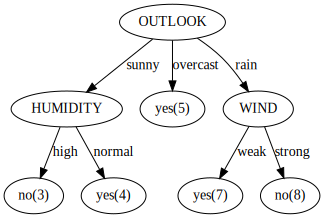

In [125]:
tree.draw()

IMPLEMENTING THE PREDICT FUNCTION:

      - Initinally traverse the decision tree untill we reach a leaf node

      - If the vaule is not in the training data then return none
      
      - Else Return the Label associated with the leaf node

In [126]:
def predict(root, data):
        node = root
        while node.children:
          feature_value = data[node.name]
          try:
              child_index = node.label.index(feature_value)
              node = node.children[child_index]
          except ValueError:
              return None
        return node.name.split('(')[0]

In [127]:
input = pd.DataFrame(
    {
        'OUTLOOK': ['sunny','overcast','rain'],
        'TEMP': ['cool','hot','mild'],
        'HUMIDITY': ['high','normal','high'],
        'WIND': ['weak','strong','weak'] 
    }
)

In [128]:
input

,OUTLOOK,TEMP,HUMIDITY,WIND
0,sunny,cool,high,weak
1,overcast,hot,normal,strong
2,rain,mild,high,weak


In [129]:
for _,row in input.iterrows():
  predictions = predict(root,row)
  print(predictions)

no
yes
yes


<h1>END</h1>